# Data Analysis: Inflation & Consumer Spending(2015-2024)

In this notebook, we analyze U.S. inflation and real consumer spending using monthly macroeconomic data. It explores the relationship between inflation (measured via CPI) and consumer spending (nominal and real PCE) in the U.S. from 2015 to 2024.  

We conduct the following steps:
1. Load and profile the dataset
2. Perform Exploratory Data Analysis (EDA) to identify trends, correlations, and growth patterns
3. Build regression models to quantify the impact of inflation on real consumer spending
4. Evaluate model fit with AIC and BIC




#### Load and Prepare Data

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned dataset
df = pd.read_csv("macro_monthly.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Display first 5 rows
df.head()

,date,cpi,pce,cpi_index_2015_01_100,real_pce,pce_yoy_pct,real_pce_yoy_pct,cpi_yoy_pct
0,2015-01-01,234.747,12066.7,100.000000,12066.700000,NaN,NaN,NaN
1,2015-02-01,235.342,12116.6,100.253464,12085.966382,NaN,NaN,NaN
2,2015-03-01,235.976,12176.1,100.523542,12112.684962,NaN,NaN,NaN
3,2015-04-01,236.222,12209.1,100.628336,12132.864838,NaN,NaN,NaN
4,2015-05-01,237.001,12275.4,100.960183,12158.654705,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

The EDA phase focuses on uncovering key trends and relationships between inflation and consumer spending over the 2015–2024 period. 

We aim to:
1. Visualize trends in nominal and real PCE alongside CPI.
2. Examine year-over-year growth rates to identify short-term and long-term fluctuations.
3. Assess correlations between inflation and consumer spending.
4. Compute descriptive statistics to characterize distributions.


### 1. Trend Visualization

Line charts of CPI, nominal PCE, and real PCE allow us to visually identify inflationary periods and corresponding consumer spending responses.


#### Trend Plots

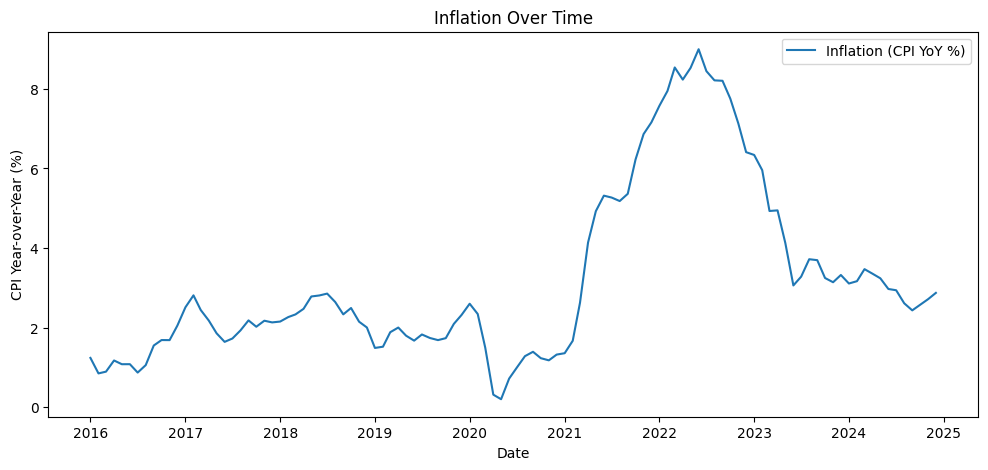

In [12]:
# Plotting Year-over-Year Inflation (CPI YoY %)
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['cpi_yoy_pct'], label='Inflation (CPI YoY %)')
plt.title("Inflation Over Time")
plt.xlabel("Date")
plt.ylabel("CPI Year-over-Year (%)")
plt.legend()
plt.show()


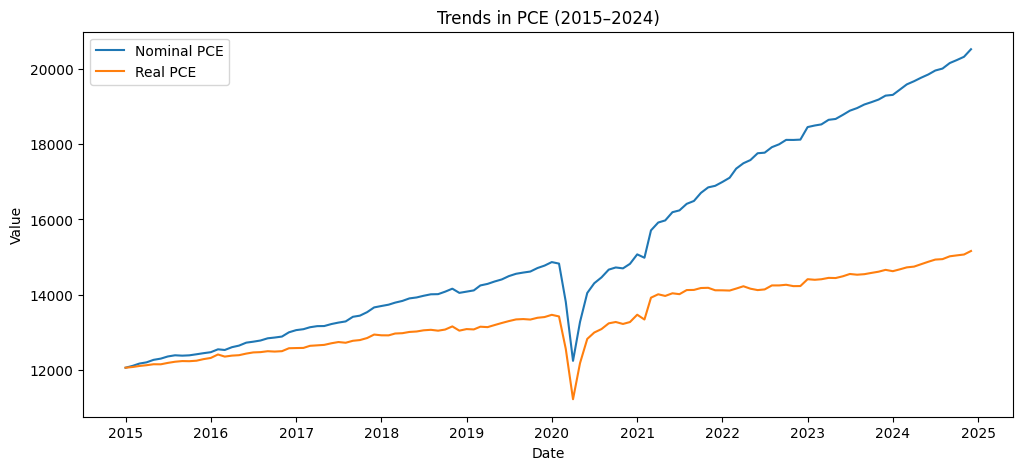

In [13]:
# Plotting Nominal and Real Personal Consumption Expenditures (PCE)
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['pce'], label='Nominal PCE')
plt.plot(df['date'], df['real_pce'], label='Real PCE')
plt.title("Trends in PCE (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### 2. Growth Rate Analysis

We examine year-over-year changes to capture short-term and long-term fluctuations in CPI and PCE.



#### Growth Rate Plot

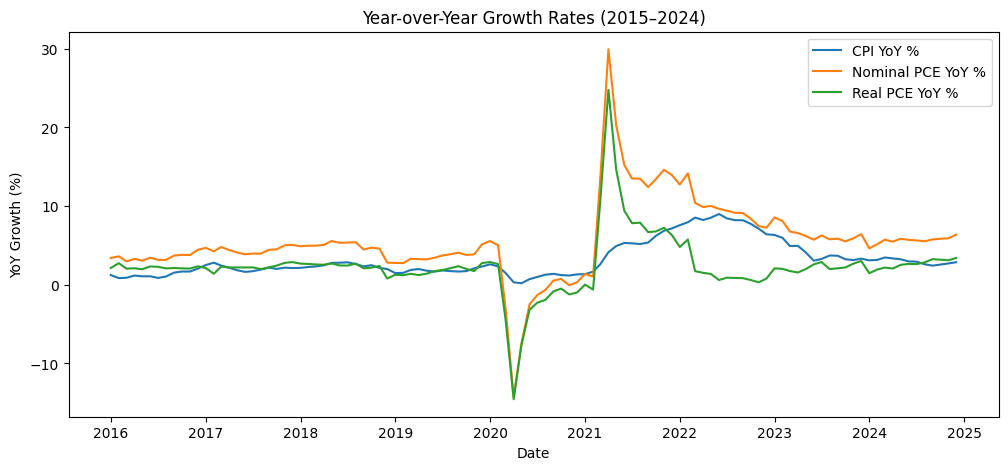

In [14]:
# Plotting Year-over-Year Growth Rates for CPI and PCE
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['cpi_yoy_pct'], label='CPI YoY %')
plt.plot(df['date'], df['pce_yoy_pct'], label='Nominal PCE YoY %')
plt.plot(df['date'], df['real_pce_yoy_pct'], label='Real PCE YoY %')
plt.title("Year-over-Year Growth Rates (2015–2024)")
plt.xlabel("Date")
plt.ylabel("YoY Growth (%)")
plt.legend()
plt.show()

## 3. Correlation Analysis

We compute correlations to assess the linear relationship between CPI growth and both nominal and real PCE growth.


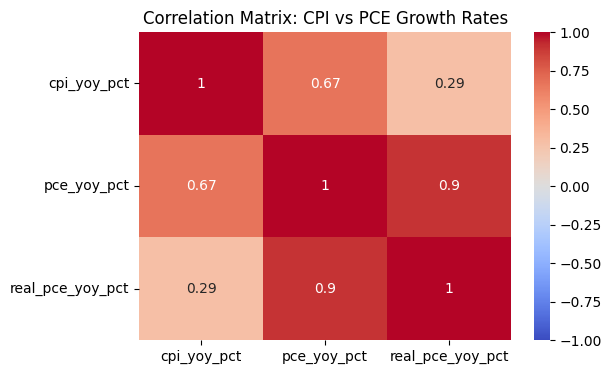

In [15]:
# Correlation Analysis Between CPI and PCE Growth Rates
corr_df = df[['cpi_yoy_pct', 'pce_yoy_pct', 'real_pce_yoy_pct']]
plt.figure(figsize=(6,4))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: CPI vs PCE Growth Rates")
plt.show()

#### 4. Descriptive Statistics

Summary measures (mean, variance, skewness, kurtosis) for key indicators to characterize their distributions.



In [16]:
# Descriptive Statistics for CPI and PCE Growth Rates
desc_stats = df[['cpi_yoy_pct', 'pce_yoy_pct', 'real_pce_yoy_pct']].describe()
desc_stats.loc['skew'] = df[['cpi_yoy_pct', 'pce_yoy_pct', 'real_pce_yoy_pct']].skew()
desc_stats.loc['kurtosis'] = df[['cpi_yoy_pct', 'pce_yoy_pct', 'real_pce_yoy_pct']].kurtosis()
desc_stats



,cpi_yoy_pct,pce_yoy_pct,real_pce_yoy_pct
count,108.000000,108.000000,108.000000
mean,3.186891,5.606986,2.322393
std,2.200511,5.030534,3.784738
min,0.198201,-14.281316,-14.548818
25%,1.685568,3.690036,1.457889
50%,2.456096,5.028547,2.139095
75%,3.700971,6.397404,2.687579
max,8.999298,29.947262,24.784463
skew,1.234785,0.803726,1.450584
kurtosis,0.497386,6.938235,15.426518


# Statistical Modeling

We estimate regression models to examine:
1. Immediate effect of inflation on real consumer spending
2. Lagged effect of inflation (1-month and 2-month lags)


### Create Lagged Inflation Variables

In [17]:
# Preparing Data for Regression Modeling with Lagged CPI Variables
df['cpi_yoy_pct_lag1'] = df['cpi_yoy_pct'].shift(1)
df['cpi_yoy_pct_lag2'] = df['cpi_yoy_pct'].shift(2)

# Drop rows with NaNs from YoY calculation and lagged values
model_df = df.dropna(subset=['cpi_yoy_pct','cpi_yoy_pct_lag1','cpi_yoy_pct_lag2','real_pce'])
model_df.head()


,date,cpi,pce,cpi_index_2015_01_100,real_pce,pce_yoy_pct,real_pce_yoy_pct,cpi_yoy_pct,cpi_yoy_pct_lag1,cpi_yoy_pct_lag2
14,2016-03-01,238.080,12537.0,101.419826,12361.488319,2.964003,2.054073,0.891616,0.847278,1.237503
15,2016-04-01,238.992,12611.5,101.808330,12387.493265,3.295902,2.098667,1.172626,0.891616,0.847278
16,2016-05-01,239.557,12652.7,102.049014,12398.649870,3.073627,1.973863,1.078476,1.172626,0.891616
17,2016-06-01,240.222,12731.2,102.332298,12441.037900,3.439254,2.334769,1.079287,1.078476,1.172626
18,2016-07-01,240.101,12756.7,102.280753,12472.238995,3.168647,2.280481,0.868363,1.079287,1.078476


## 1. Baseline Regression

Model: Real PCE = β0 + β1 * Inflation + ε


In [18]:
# Baseline Linear Regression: Real PCE vs Current CPI YoY
import statsmodels.api as sm

X = sm.add_constant(model_df['cpi_yoy_pct'])
y = model_df['real_pce']

baseline_model = sm.OLS(y, X).fit()
baseline_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               real_pce   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     54.26
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           4.32e-11
Time:                        00:36:59   Log-Likelihood:                -841.96
No. Observations:                 106   AIC:                             1688.
Df Residuals:                     104   BIC:                             1693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.284e+04    118.968    107.949      0.000    1.26e+04    1.31e+04
cpi_yoy_pct   224.6638     30.500      7.366      0.000     164.181     285.146
==============================================================================
Omnibus:                       11.186   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.074
Skew:                           0.825   Prob(JB):                      0.00239
Kurtosis:                       3.116   Cond. No.                         7.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Lagged Regression

Model: Real PCE = β0 + β1 * Inflation_t + β2 * Inflation_{t-1} + β3 * Inflation_{t-2} + ε


In [19]:
# Linear Regression with Lagged CPI Variables
X_lag = sm.add_constant(model_df[['cpi_yoy_pct', 'cpi_yoy_pct_lag1', 'cpi_yoy_pct_lag2']])
lagged_model = sm.OLS(y, X_lag).fit()
lagged_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               real_pce   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     18.16
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           1.63e-09
Time:                        00:37:47   Log-Likelihood:                -841.54
No. Observations:                 106   AIC:                             1691.
Df Residuals:                     102   BIC:                             1702.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.283e+04    120.586    106.389      0.000    1.26e+04    1.31e+04
cpi_yoy_pct        260.2643    197.123      1.320      0.190    -130.728     651.256
cpi_yoy_pct_lag1  -197.2866    337.301     -0.585      0.560    -866.321     471.748
cpi_yoy_pct_lag2   166.3890    195.371      0.852      0.396    -221.128     553.906
==============================================================================
Omnibus:                       10.166   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.632
Skew:                           0.771   Prob(JB):                      0.00491
Kurtosis:                       3.165   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Model Comparison

Compare baseline and lagged models using AIC and BIC.


In [11]:
print("Baseline Model AIC:", baseline_model.aic)
print("Lagged Model AIC:", lagged_model.aic)

print("Baseline Model BIC:", baseline_model.bic)
print("Lagged Model BIC:", lagged_model.bic)


Baseline Model AIC: 1687.9244926388249
Lagged Model AIC: 1691.0744258941263
Baseline Model BIC: 1693.251370827049
Lagged Model BIC: 1701.7281822705745
